In [50]:
import pyfits
import numpy as np

path = '/Users/thbrown/AA_project/TOBY_STACKING/SAMPLES/FULL/ENVIRONMENT/'

plotdir = '/Users/thbrown/AA_project/TOBY_STACKING/ENVIRONMENT/plots/characterisation/'


hdulist = pyfits.open(path+'nuvr_halo_LD_NN.fits')
tbdata = hdulist[1].data
ID = tbdata['ID']
z = tbdata['Z']
ms = tbdata['lgMst_median']
halo = tbdata['haloM_Mst']
# ld_Mpc2 = tbdata['ld_Mpc2']
# ld_Mpc3 = tbdata['ld_Mpc3']
nn3_Mpc3 = tbdata['nn3_Mpc3']
nn5_Mpc3 = tbdata['nn5_Mpc3']
nn7_Mpc3 = tbdata['nn7_Mpc3']
nn10_Mpc3 = tbdata['nn10_Mpc3']
nuvr = tbdata['NUV_r']
mu = tbdata['mu_star']
u_mag = tbdata['modelMag_u']
r_mag = tbdata['modelMag_r']
u_r = u_mag - r_mag

print len(halo)

13278


In [11]:
# calculate percentile rank of NN dist
import scipy.stats as stats

p_rank = [1,2,4,5,6,7,8,9]

for i in p_rank:
    print stats.percentileofscore(p_rank, i)


12.5
25.0
37.5
50.0
62.5
75.0
87.5
100.0


In [51]:
# calculate percentile rank of NN dist
import scipy.stats as stats

p_rank_3nn = []
p_rank_7nn = []

for i in range(len(ID)):
    p_rank_3nn.append(stats.percentileofscore(nn3_Mpc3, nn3_Mpc3[i]))
    p_rank_7nn.append(stats.percentileofscore(nn7_Mpc3, nn7_Mpc3[i]))
    
p_rank_3nn = np.array(p_rank_3nn)
p_rank_7nn = np.array(p_rank_7nn)

print 'done'

done


In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

plotdir = '/Users/thbrown/AA_project/TOBY_STACKING/ENVIRONMENT/plots/characterisation/'

# plt.figure()
# plt.plot(N, N_cos, '.')

plt.figure()
n, bins, patches = plt.hist(nuvr[np.where(p_rank_7nn <= 20)], 30, 
                            edgecolor='r', linewidth=5, facecolor='r', alpha=0.75, 
                               label = '20% least dense')
n, bins, patches = plt.hist(nuvr[np.where(p_rank_7nn >= 80)], 30, 
                            edgecolor='b', linewidth=5, facecolor='none', alpha=0.75, 
                               label = '20% most dense')
plt.xlabel('NUV-r [mag]', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('7 Neighbours (with halo masses)')
plt.legend()
plt.savefig(plotdir+'7nn_whalo_nuvr_percentile.pdf')
plt.clf()

plt.figure()
n, bins, patches = plt.hist(nuvr[np.where(p_rank_3nn <= 20)], 30, 
                            edgecolor='r', linewidth=5, facecolor='r', alpha=0.75, 
                               label = '20% least dense')
n, bins, patches = plt.hist(nuvr[np.where(p_rank_3nn >= 80)], 30, 
                            edgecolor='b', linewidth=5, facecolor='none', alpha=0.75, 
                               label = '20% most dense')
plt.xlabel('NUV-r [mag]', fontsize=18)
plt.ylabel('count', fontsize=18)
plt.title('3 Neighbours (with halo masses)')
plt.legend()
plt.savefig(plotdir+'3nn_whalo_nuvr_percentile.pdf')
plt.clf()

plt.figure()
# n, bins, patches = plt.hist(nn7_Mpc3[p_20], 30,edgecolor='r', linewidth=5, facecolor='r', alpha=0.75)
# n, bins, patches = plt.hist(nn7_Mpc3[p_80], 30,edgecolor='b', linewidth=5, facecolor='none', alpha=0.75)

plt.show()

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as so
 
def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level
 
def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.

    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
    """
 
    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), normed=True)
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))
 
    pdf = (H*(x_bin_sizes*y_bin_sizes))
 
    one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
    three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.99))
    levels = [one_sigma, two_sigma,   three_sigma]
    
 
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
 
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        contour = plt.contourf(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
 
    return contour
 
# def test_density_contour():
#     norm = np.random.normal(10., 15., size=(12540035, 2))
#     density_contour(norm[:,0], norm[:,1], 100, 100)
#     plt.show()
 
# test_density_contour()

In [100]:
bins = 20
density_contour(halo, p_rank_7nn, bins, bins, cmap=plt.cm.rainbow)
plt.xlabel('log halo mass [Msol]', fontsize=18)
plt.ylabel('percentile rank', fontsize=18)
plt.title('7 Neighbours')
plt.savefig(plotdir+'halo_7nn_percentile.pdf')
plt.clf()

/Users/thbrown/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:2181: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  different = bool(ours != theirs)


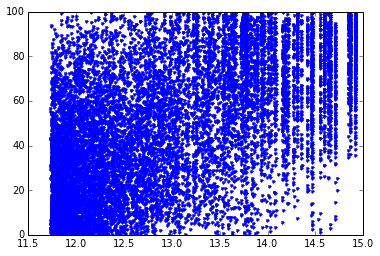

In [70]:
plt.plot(halo, p_rank_3nn, '.')
plt.show()
